Documentation on numpy, scipy, opencv and matplotlib for vector and matrix manipulation.

In [5]:
import itertools
import enum
import numpy as np
import pandas as pd
import cv2 as cv
import scipy
import scipy.special
import scipy.spatial
import scipy.stats
import scipy.ndimage
import seaborn as sns
import matplotlib
import matplotlib.patches
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.path import Path

import utility as util
import utility.doc

def rotation_2d(theta):
    return np.array([
            [ np.cos(theta), np.sin(theta)],
            [-np.sin(theta), np.cos(theta)]])

## Gotchas

In [2]:
util.doc.results(
    "adding two lists together", ([1,], [2,3,], [1,] + [2,3,]),
    "adding a list and an ndarray together", ([1,], np.array([2,3,]), [1,] + np.array([2,3,])),
    "equivalent to extending a list by and ndarray", [1, *np.array([2,3,])],
    "another way via concatenation", np.concatenate(([1,], np.array([2,3,]))),
start=(
    "Adding lists together results in concatenation, \n"
    "but adding a list and an array results in addition."
))

Adding lists together results in concatenation, 
but adding a list and an array results in addition.

adding two lists together
([1], [2, 3], [1, 2, 3])

adding a list and an ndarray together
([1], array([2, 3]), array([3, 4]))

equivalent to extending a list by and ndarray
[1, 2, 3]

another way via concatenation
[1 2 3]


## Array Creation and Basic Usage

In [6]:
# create an array using a range is the same as using np.arange()
np.array(range(5)), np.arange(5)

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [13]:
# create an array using an iterable
i = iter([1,2,3])
j = iter([[1,2],[3,4],[5,6]])

# can't convert an iterable of lists.
try:
    np.fromiter(j, dtype=int)
except ValueError as e:
    print(e)

np.fromiter(i, dtype=int)

setting an array element with a sequence.


array([1, 2, 3])

In [8]:
# De-referencing arrays
a = np.arange(3)
a1, a2, a3 = a
b1, b2, b3 = a.T
# a, a1, a2, a3, a.T, b1, b2, b3
print(a)

[0 1 2]


In [15]:
# create a matrix and fill with a constant
np.full((2, 3), 1.2), np.full(2, 1.2)

(array([[1.2, 1.2, 1.2],
        [1.2, 1.2, 1.2]]),
 array([1.2, 1.2]))

In [16]:
# create an identity matrix
np.diag(np.full(4, 1))

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [5]:
# create a block diagonal matrix
C1 = np.arange(1, 7).reshape(3, 2)
C2 = np.arange(7, 13).reshape(2, 3)
C3 = np.arange(13, 17).reshape(2, 2)
C = scipy.linalg.block_diag(C1, C2, C3)
util.doc.results(
    "upper block", C1,
    "middle block", C2,
    "lower block", C3,
    "block diagonal matrix", C,
start="create a block diagonal matrix")

create a block diagonal matrix

upper block
[[1 2]
 [3 4]
 [5 6]]

middle block
[[ 7  8  9]
 [10 11 12]]

lower block
[[13 14]
 [15 16]]

block diagonal matrix
[[ 1  2  0  0  0  0  0]
 [ 3  4  0  0  0  0  0]
 [ 5  6  0  0  0  0  0]
 [ 0  0  7  8  9  0  0]
 [ 0  0 10 11 12  0  0]
 [ 0  0  0  0  0 13 14]
 [ 0  0  0  0  0 15 16]]


In [8]:
# create a block matrix
C1 = np.full((2, 2), 1)
C2 = np.full((2, 3), 2)
C3 = np.full((3, 2), 3)
C4 = np.full((3, 3), 4)
C = np.block([
    [C1, C2],
    [C3, C4]
])
util.doc.results(
    "upper left matrix", C1,
    "upper right matrix", C2,
    "lower left matrix", C3,
    "lower right matrix", C4,
    "block matrix", C,
start="create a block matrix")

create a block matrix

upper left matrix
[[1 1]
 [1 1]]

upper right matrix
[[2 2 2]
 [2 2 2]]

lower left matrix
[[3 3]
 [3 3]
 [3 3]]

lower right matrix
[[4 4 4]
 [4 4 4]
 [4 4 4]]

block matrix
[[1 1 2 2 2]
 [1 1 2 2 2]
 [3 3 4 4 4]
 [3 3 4 4 4]
 [3 3 4 4 4]]


In [120]:
# create a meshgrid
N = 3
X = np.linspace(0, 2, N)
Y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(X, Y)
X, Y

(array([[0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.]]),
 array([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]]))

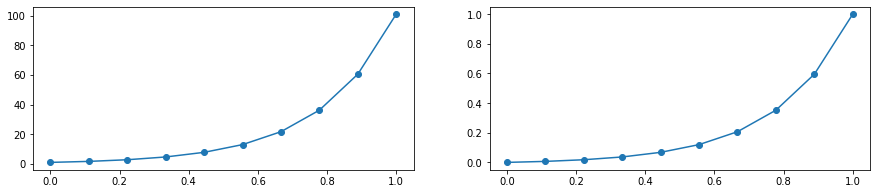

In [61]:
# Generate geometrically spaced numbers using np.geomspace()
N = 10
x = np.linspace(0, 1, N)
y1 = np.geomspace(1, 101, N, endpoint=True)
y2 = (y1 - 1) / 100
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
axes[0].plot(x, y1, '-o')
axes[1].plot(x, y2, '-o')

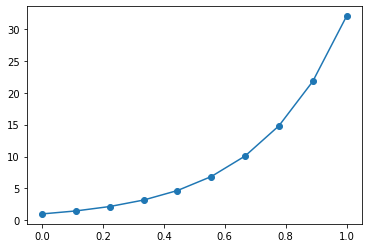

In [67]:
# Generate logarithmically spaced numbers using np.geomspace()
N = 10
x = np.linspace(0, 1, N)
y = np.logspace(0, 5, N, endpoint=True, base=2.0)
plt.plot(x, y, '-o')

## Mathematical Operations

In [2]:
# Sigmoid function (applied to an array)
def sigmoid(z):
    return 1 / (np.exp(-z) + 1)

sigmoid(np.array([1,2,3]))

array([0.73105858, 0.88079708, 0.95257413])

In [3]:
# Softplus function (applied to an array)
def softplus(z):
    return np.log(1 + np.exp(z))

softplus(np.array([1,2,3]))

array([1.31326169, 2.12692801, 3.04858735])

In [3]:
# Array reshaping, shape and dimension
A = np.arange(6).reshape((2, 3))
A, A.shape, A.ndim

(array([[0, 1, 2],
        [3, 4, 5]]),
 (2, 3),
 2)

In [34]:
# Subarrays indexing
a = np.arange(8)
a, a[3], a[:3], a[3:], a[3:6], a[3:6:2], a[3::2]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 3,
 array([0, 1, 2]),
 array([3, 4, 5, 6, 7]),
 array([3, 4, 5]),
 array([3, 5]),
 array([3, 5, 7]))

In [3]:
# Vector-scalar operations
a = np.arange(3) + 1
a, 2 * a, a / 2, 2 / a, a + 2, a - 2, a**2

(array([1, 2, 3]),
 array([2, 4, 6]),
 array([0.5, 1. , 1.5]),
 array([2.        , 1.        , 0.66666667]),
 array([3, 4, 5]),
 array([-1,  0,  1]),
 array([1, 4, 9]))

In [41]:
# In-place mutation of array
a = np.arange(4) + 1
a[0] *= -1
a[1] /= 2
a[2] += 1
a[3] -= 1
a

array([-1,  1,  4,  3])

In [14]:
# Row wise application of b on A
A = np.array([np.arange(3), np.arange(3) + 1, np.arange(3) + 2, np.arange(3) + 3])
b = np.array([-1, -1/2, 1/2, 2])
A, b, A + b[:, None], A * b[:, None], A / b[:, None]

(array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]),
 array([-1. , -0.5,  0.5,  2. ]),
 array([[-1. ,  0. ,  1. ],
        [ 0.5,  1.5,  2.5],
        [ 2.5,  3.5,  4.5],
        [ 5. ,  6. ,  7. ]]),
 array([[-0. , -1. , -2. ],
        [-0.5, -1. , -1.5],
        [ 1. ,  1.5,  2. ],
        [ 6. ,  8. , 10. ]]),
 array([[-0. , -1. , -2. ],
        [-2. , -4. , -6. ],
        [ 4. ,  6. ,  8. ],
        [ 1.5,  2. ,  2.5]]))

In [65]:
# The * operation is the Hadamard product on vectors
a = np.array([1,2,3])
b = np.array([4,5,6])
a * b, np.einsum("i,i->i", a, b)

(array([ 4, 10, 18]), array([ 4, 10, 18]))

In [62]:
# Dot product
# a.dot(b) is equivalent to np.dot(a, b)
# The @ operation is also a dot product on vectors
a = np.array([1,2,3])
b = np.array([4,5,6])
a.dot(b), a @ b, np.einsum("i,i->", a, b)

(32, 32, 32)

In [19]:
# Matrix-vector multiplication
A = np.array([
    [1, 2],
    [4, 2]])
b = np.array([1,2])
A @ b, np.einsum("ij,j->i", A, b)

(array([5, 8]), array([5, 8]))

In [6]:
# Matrix-vector operations
A = np.array([
    [1, 2],
    [3, 1]])
b = np.array([2,-1])
A + b, A - b

(array([[3, 1],
        [5, 0]]),
 array([[-1,  3],
        [ 1,  2]]))

In [4]:
# addition and subtraction is along the the last most axes.
A = np.array([
    [ [0,1], [2,1], [1,2] ],
    [ [1,0], [0,-1], [-1,0] ] ])
b = np.array([1,-1])
A, A + b, A - b

(array([[[ 0,  1],
         [ 2,  1],
         [ 1,  2]],
 
        [[ 1,  0],
         [ 0, -1],
         [-1,  0]]]),
 array([[[ 1,  0],
         [ 3,  0],
         [ 2,  1]],
 
        [[ 2, -1],
         [ 1, -2],
         [ 0, -1]]]),
 array([[[-1,  2],
         [ 1,  2],
         [ 0,  3]],
 
        [[ 0,  1],
         [-1,  0],
         [-2,  1]]]))

In [4]:
# Matrix-matrix multiplication
A = np.array([
    [1, 2],
    [4, 2]])
B = np.array([
    [2, 0],
    [0, -1]])

def matmul(A, B):
    C = np.zeros((A.shape[0], B.shape[1]), dtype=A.dtype)
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i,j] += A[i,k]*B[k,j]
    return C

matmul(A, B), A @ B, np.einsum("ij,jk->ik", A, B)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[ 2, -2],
        [ 8, -2]]),
 array([[ 2, -2],
        [ 8, -2]]))

In [30]:
# Matrix-vector multiplication broadcasted across multiple matrices
A = np.array([
    [
        [2, 0],
        [0,-1],
    ],[
        [1,2],
        [1,0]
    ]
])
b = np.array([1,2])
A[0] @ b, A[1] @ b, A @ b

(array([ 2, -2]),
 array([5, 1]),
 array([[ 2, -2],
        [ 5,  1]]))

In [76]:
# Batched Matrix-vector multiplication using np.einsum()
A = np.array([
    [
        [2, 0],
        [0,-1],
    ],[
        [1,2],
        [1,0]
    ]
])
b = np.array([
    [1,2],
    [-1,1]
])
A[0] @ b[0], A[1] @ b[1], np.einsum("...jk, ...k ->...j", A, b)

(array([ 2, -2]),
 array([ 1, -1]),
 array([[ 2, -2],
        [ 1, -1]]))

In [122]:
# Batched Matrix-matrix multiplication using np.einsum()
A = np.array([
    [
        [1, 2],
        [4, 2]
    ],[
        [3, 1],
        [2,-1]
    ]
])
B = np.array([
    [
        [2, 0],
        [0, -1]
    ],[
        [2, 1],
        [1, 0]
    ]
])
A[0] @ B[0], A[1] @ B[1], np.einsum("...ij,...jk->...ik", A, B)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[7, 3],
        [3, 2]]),
 array([[[ 2, -2],
         [ 8, -2]],
 
        [[ 7,  3],
         [ 3,  2]]]))

In [123]:
# Matrix to Batched matrix multiplication using np.einsum()
A = np.array([
        [1, 2],
        [4, 2]])
B = np.array([
    [
        [2, 0],
        [0, -1]
    ],[
        [2, 1],
        [1, 0]
    ]
])
A @ B[0], A @ B[1], B[0] @ A, B[1] @ A, np.einsum("ij,...jk->...ik", A, B), np.einsum("...ij,jk->...ik", B, A)

(array([[ 2, -2],
        [ 8, -2]]),
 array([[ 4,  1],
        [10,  4]]),
 array([[ 2,  4],
        [-4, -2]]),
 array([[6, 6],
        [1, 2]]),
 array([[[ 2, -2],
         [ 8, -2]],
 
        [[ 4,  1],
         [10,  4]]]),
 array([[[ 2,  4],
         [-4, -2]],
 
        [[ 6,  6],
         [ 1,  2]]]))

In [132]:
# Matrix to batched vector multiplication using np.einsum()
A = np.array([
    [1,2],
    [1,0]
])
b = np.array([[1,2], [-1,1], [3,-1]])
A @ b[0], A @ b[1], A @ b[2], np.einsum("jk, ...k ->...j", A, b)

(array([5, 1]),
 array([ 1, -1]),
 array([1, 3]),
 array([[ 5,  1],
        [ 1, -1],
        [ 1,  3]]))

In [11]:
# batch vector-vector dot product using np.einsum()
a = np.array([
    [ 0, -1],
    [-2,  1],
    [ 1,  1]
])
b = np.array([
    [2, 1],
    [1, 2],
    [-1,2]
])
a[0] @ b[0], a[1] @ b[1], a[2] @ b[2], np.einsum("...i, ...i -> ...", a, b)

(-1, 0, 1, array([-1,  0,  1]))

In [16]:
# Kronecker multiplication of two vectors
a = np.array([-1, 2])[:,None]
b = np.arange(1, 5)[None,:]
a, b, np.kron(a, b)

(array([[-1],
        [ 2]]),
 array([[1, 2, 3, 4]]),
 array([[-1, -2, -3, -4],
        [ 2,  4,  6,  8]]))

In [5]:
# Kronecker addition of two vectors
a = np.array([-1, 1])
b = np.arange(4)
a[:, None] + b[None, :], a[None, :] + b[:, None]

(array([[-1,  0,  1,  2],
        [ 1,  2,  3,  4]]),
 array([[-1,  1],
        [ 0,  2],
        [ 1,  3],
        [ 2,  4]]))

In [8]:
# Trace of matrix
A = np.array([
    [
        [1, 2],
        [4, 2]
    ],[
        [3, 1],
        [2,-1]
    ]
])
np.trace(A[0]), np.trace(A[1]), np.einsum("...ii", A)

(3, 2, array([3, 2]))

In [34]:
# Operations on rows between arrays.
# A * b means element-wise multiplication of A[i] by b for each row A[i] of A
# A / b means element-wise division       of A[i] by b for each row A[i] of A
A = np.array([
    [1,2],
    [3,4],
    [5,6]])
b = np.array([1, -2])
A * b, np.einsum("ji,i->ji", A, b), A / b

(array([[  1,  -4],
        [  3,  -8],
        [  5, -12]]),
 array([[  1,  -4],
        [  3,  -8],
        [  5, -12]]),
 array([[ 1., -1.],
        [ 3., -2.],
        [ 5., -3.]]))

In [38]:
# take the power of bases b by their exponents e element-wise.
# np.power() requires exponent to be positive integers.
# for more general exponents use np.float_power()
b = np.array([2,-2,2,-2, 0.5, -0.5])
e = np.array([2,2,3,3,2,2])
np.power(b, e)

array([ 4.  ,  4.  ,  8.  , -8.  ,  0.25,  0.25])

In [112]:
# Summing up an axis of an array
A = np.array([
    [1,2],
    [3,4],
    [5,6]])
print("Sum/product/max of all entries of A")
print(np.sum(A), np.prod(A), np.max(A))
print("Sum/product/max the columns of A")
print(np.sum(A, axis=0), np.prod(A, axis=0), np.max(A, axis=0))
print("Sum the rows of A")
print(np.sum(A, axis=1), np.prod(A, axis=1), np.max(A, axis=1))

Sum/product/max of all entries of A
21 720 6
Sum/product/max the columns of A
[ 9 12] [15 48] [5 6]
Sum the rows of A
[ 3  7 11] [ 2 12 30] [2 4 6]


In [49]:
# Computing the determinant of an array of 2D matrices
B = []
A1 = rotation_2d(np.pi / 4)
B.append(A1)
A2 = rotation_2d(np.pi / 3)
A2[0,0] *= 2; A2[1,1] *= 2
B.append(A2)
A3 = rotation_2d(4*np.pi / 3)
A3[0,0] *= 1.2; A3[1,1] *= 10
B.append(A3)
B = np.stack(B)
np.linalg.det(A1), np.linalg.det(A2), np.linalg.det(A3), np.linalg.det(B)

(1.0, 1.7500000000000004, 3.7500000000000044, array([1.  , 1.75, 3.75]))

In [50]:
# Computing the condition number of an array of 2D matrices
B = []
A1 = rotation_2d(np.pi / 4)
B.append(A1)
A2 = rotation_2d(np.pi / 3)
A2[0,0] *= 2; A2[1,1] *= 2
B.append(A2)
A3 = rotation_2d(4*np.pi / 3)
A3[0,0] *= 1.2; A3[1,1] *= 10
B.append(A3)
B = np.stack(B)
np.linalg.cond(A1), np.linalg.cond(A2), np.linalg.cond(A3), np.linalg.cond(B)

(1.0,
 1.0000000000000002,
 7.020221008795337,
 array([1.        , 1.        , 7.02022101]))

In [149]:
# checking that matrix is positive semi-definite

def is_positive_semidefinite(X):
    """Check that a matrix is positive semidefinite
    
    Based on:
    https://stackoverflow.com/a/63911811
    """
    if X.shape[0] != X.shape[1]:
        return False
    if not np.all( X - X.T == 0 ):
        return False
    try:
        regularized_X = X + np.eye(X.shape[0]) * 1e-14
        np.linalg.cholesky(regularized_X)
    except np.linalg.linalg.LinAlgError as err:
        if "Matrix is not positive definite"  == str(err):
            return False
        raise err
    return True

def is_positive_definite(X):
    """Check that a matrix is positive definite
    
    Based on:
    https://stackoverflow.com/a/63911811
    """
    if X.shape[0] != X.shape[1]:
        return False
    if not np.all( X - X.T == 0 ):
        return False
    try:
        np.linalg.cholesky(X)
    except np.linalg.linalg.LinAlgError as err:
        if "Matrix is not positive definite"  == str(err):
            return False
        raise err
    return True

A = np.array([[2,1],[1,2]])
B = np.array([[0,1],[1,0]])
C = np.array([[2,1],[2,2]])
D = np.array([[2,0],[0,0]])
np.linalg.eigvals(A), is_positive_semidefinite(A), is_positive_definite(A), \
        np.linalg.eigvals(B), is_positive_semidefinite(B), is_positive_definite(B), \
        np.linalg.eigvals(C), is_positive_semidefinite(C), is_positive_definite(C), \
        np.linalg.eigvals(D), is_positive_semidefinite(D), is_positive_definite(D)

(array([3., 1.]),
 True,
 True,
 array([ 1., -1.]),
 False,
 False,
 array([3.41421356, 0.58578644]),
 False,
 False,
 array([2., 0.]),
 True,
 False)

In [116]:
# Applying Cholesky decomposition to a positive semidefinite matrix 

A = np.array([[2,1,0.5],[1,3,0.3],[0.5,0.3,2]])
L = np.linalg.cholesky(A)
# Not that when A = L L^T then |A| = |L|^2 and |L| is the produce of L's diagonals.
A, L, L @ L.T, np.linalg.det(A), np.linalg.det(L)**2, np.linalg.det(L), np.prod(np.diag(L))

(array([[2. , 1. , 0.5],
        [1. , 3. , 0.3],
        [0.5, 0.3, 2. ]]),
 array([[1.41421356, 0.        , 0.        ],
        [0.70710678, 1.58113883, 0.        ],
        [0.35355339, 0.03162278, 1.3689412 ]]),
 array([[2. , 1. , 0.5],
        [1. , 3. , 0.3],
        [0.5, 0.3, 2. ]]),
 9.370000000000003,
 9.370000000000005,
 3.061045573002794,
 3.0610455730027937)

In [39]:
def binary_decision(b, values=(-1, 1)):
    if isinstance(b, bool):
        return values[0]*int(not b) + values[1]*int(b)
    elif isinstance(b, list):
        return util.map_to_list(lambda x: binary_decision(x, values=values), b)
    elif isinstance(b, np.ndarray):
        if np.issubdtype(b.dtype, np.dtype('bool')):
            return values[0]*np.logical_not(b) + values[1]*b
        else:
            raise ValueError(f"Cannot handle dtype {str(b.dtype)}")
    else:
        raise NotImplementedError(f"Handing type {type(b)} not implemented.")

bs = np.array([True, False])
binary_decision(True), binary_decision(False), \
    binary_decision(True,  values=(0, 1)), \
    binary_decision(False, values=(0, 1)), \
    binary_decision(bs), binary_decision([True, False])

(1, -1, 1, 0, array([ 1, -1]), [1, -1])

In [11]:
# Another way of implementing binary_decision() (much more simple)
np.where(np.array([True,False,True]), 1, -1), np.where(False, 1, -1)

(array([ 1, -1,  1]), array(-1))

## Numpy data types

In [24]:
a = np.array(range(5))
l = list(range(5))
M = np.matrix([[1,2],[3,4]])
util.doc.results(
    "Methods using factory np.array are type np.ndarray", isinstance(a, np.ndarray),
    "Lists are not np.ndarray", isinstance(l, np.ndarray),
    "np.ndarray are not lists", isinstance(a, list),
    "np.matrix are np.ndarray", isinstance(M, np.ndarray),
    "np.matrix is a class", isinstance(M, np.matrix),
compact=True)

Methods using factory np.array are type np.ndarray True
Lists are not np.ndarray False
np.ndarray are not lists False
np.matrix are np.ndarray True
np.matrix is a class True


In [27]:
# obtain max and min values of datatypes
info_float64 = np.finfo(np.float64)
print("float 64 max", info_float64.max, "min", info_float64.min)
info_int64   = np.iinfo(np.int64)
print("float 64 max", info_int64.max,   "min", info_int64.min)

float 64 max 1.7976931348623157e+308 min -1.7976931348623157e+308
float 64 max 9223372036854775807 min -9223372036854775808


In [28]:
# checking the data type of arrays
print("dtype of int array", np.array([1,2,3]).dtype )
print("dtype of float array", np.array([1.,2.,3.]).dtype )

dtype of int array int64
dtype of float array float64


In [29]:
# Using np.inf
print("inf upper bounds numbers", np.inf > 1)
print("inf fails as a lower bound", np.inf < 1)
print("negating and comparing inf is possible", np.inf > -np.inf)
print("sorting an array with inf", np.sort(np.array([np.inf, 5, 1, 4, 3]))  )
print("partitioning an array with inf", np.partition(np.array([np.inf, 5, 1, 4, 3]), 2)  )
print("multiply a positive and inf:", 2 * np.inf)
print("multiply a 0 and inf:", 0 * np.inf)

inf upper bounds numbers True
inf fails as a lower bound False
negating and comparing inf is possible True
sorting an array with inf [ 1.  3.  4.  5. inf]
partitioning an array with inf [ 1.  3.  4. inf  5.]
multiply a positive and inf: inf
multiply a 0 and inf: nan


In [30]:
# Using max float64 number
info_float64 = np.finfo(np.float64)
float64_max = info_float64.max

print("inf upper bounds numbers", float64_max > 1)
print("inf fails as a lower bound", float64_max < 1)
print("negating and comparing inf is possible", float64_max > -float64_max)
print("sorting an array with inf", np.sort(np.array([float64_max, 5, 1, 4, 3]))  )
print("partitioning an array with inf", np.partition(np.array([float64_max, 5, 1, 4, 3]), 2)  )
print("multiply a positive and inf:", 2 * float64_max)
print("add a positive and inf:", float64_max + 1)
print("multiply a 0 and inf:", 0 * float64_max)

inf upper bounds numbers True
inf fails as a lower bound False
negating and comparing inf is possible True
sorting an array with inf [1.00000000e+000 3.00000000e+000 4.00000000e+000 5.00000000e+000
 1.79769313e+308]
partitioning an array with inf [1.00000000e+000 3.00000000e+000 4.00000000e+000 1.79769313e+308
 5.00000000e+000]
multiply a positive and inf: inf
add a positive and inf: 1.7976931348623157e+308
multiply a 0 and inf: 0.0


<ipython-input-30-2eb8ffa5d3db>:10: RuntimeWarning: overflow encountered in double_scalars
  print("multiply a positive and inf:", 2 * float64_max)


In [31]:
# The smallest and largest float64 numbers.
info_float64 = np.finfo(np.float64)
float64_max = info_float64.max
-float64_max, float64_max

(-1.7976931348623157e+308, 1.7976931348623157e+308)

In [32]:
# The smallest and largest int64 numbers.
info_int64   = np.iinfo(np.int64)
int64_max = info_int64.max
-int64_max, int64_max

(-9223372036854775807, 9223372036854775807)

In [156]:
# Check that an array has any nan values
def has_nan(a):
    return np.isnan(np.sum(a))

A = np.arange(6, dtype=float).reshape(2,3)
B = A.copy()
B[1,1] = np.nan

A, has_nan(A), B, has_nan(B)

(array([[0., 1., 2.],
        [3., 4., 5.]]),
 False,
 array([[ 0.,  1.,  2.],
        [ 3., nan,  5.]]),
 True)

In [4]:
cov = np.array([[1, 0], [0, 2]])
X = np.random.multivariate_normal([-1, 1], cov, 100)
X[:10]
scipy.stats.tmean(X.T[0]), np.mean(X, axis=0)

(-0.9253441944011073, array([-0.92534419,  0.92836273]))

In [13]:
# Sometimes it's possible to do array operations on object classes.
# It's not possible to do this with docplex variables...
class O():
    def __init__(self, a):
        self.a = a
    def __add__(self, other):
        return O(self.a + other.a)
    def __mul__(self, other):
        return O(self.a * other.a)
    def __repr__(self):
        return f"O({self.a})"

A = np.array([[O(i) for i in range(3)], [O(i) for i in range(3,6)]]).T
b = np.array([O(-1), O(2)])
A, b, A @ b

(array([[O(0), O(3)],
        [O(1), O(4)],
        [O(2), O(5)]], dtype=object),
 array([O(-1), O(2)], dtype=object),
 array([O(6), O(7), O(8)], dtype=object))

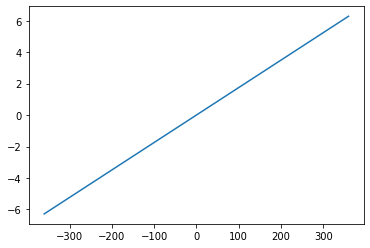

In [7]:
degs = np.linspace(-360, 360, 2*360 + 1)
rads = np.deg2rad(degs)
plt.plot(degs, rads)

## Array Manipulation and Indexing

Everything that does not involve data operations.
How to index, reshape, combine, and search through arrays.

In [17]:
# indexing an array using '...', '-1' and ':'
A = np.arange(12).reshape((2,3,2))
B = A[...,-1,:]
A, A.shape, B.shape, B

(array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],
 
        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]),
 (2, 3, 2),
 (2, 2),
 array([[ 4,  5],
        [10, 11]]))

In [29]:
# indexing using integers, tuples and lists
# indexing using a non-empty list returns an ndarray containing the values at the indices in the list
a = np.arange(5) + 10
A = np.arange(12).reshape((2,2,3))
a, a[1], a[(1)], a[[1]], a[[1,2]]

(array([10, 11, 12, 13, 14]), 11, 11, array([11]), array([11, 12]))

In [2]:
# indexing using integers, tuples and lists; more examples
A = np.arange(6).reshape(2,3) + 10
# original
# selecting the second column
# selecting the item of the second row
util.doc.results(
    "original A", A,
    "selecting the 2nd column", A[:, 1],
    "selecting the 3rd item of the 2nd row", A[(1,2)],
    "select 2nd row and unsqueeze axis 0", A[[1]],
    "select 2nd column and unsqueeze axis 1", A[:, [1]],
    "get the 2nd row twice, then get the 1st row", A[[1,1,0]],
    "get the 1st column twice, then get the 2nd column", A[:, [0, 0, 1]]
)

original A
[[10 11 12]
 [13 14 15]]

selecting the 2nd column
[11 14]

selecting the 3rd item of the 2nd row
15

select 2nd row and unsqueeze axis 0
[[13 14 15]]

select 2nd column and unsqueeze axis 1
[[11]
 [14]]

get the 2nd row twice, then get the 1st row
[[13 14 15]
 [13 14 15]
 [10 11 12]]

get the 1st column twice, then get the 2nd column
[[10 10 11]
 [13 13 14]]


In [3]:
# unsqueezing an array using `None`
A = np.arange(6).reshape(2,3) + 10
util.doc.results(
    "original A", A,
    "unsqueezing index 0 with `None`", A[None],
    "unsqueezing index 1 with `:,None`", A[:,None],
    "unsqueezing the last index with `...,None`", A[...,None],
    "select 2nd row ", A[1, None],
    "select 2nd column and unsqueeze axis 0", A[:, 1, None]
)

original A
[[10 11 12]
 [13 14 15]]

unsqueezing index 0 with `None`
[[[10 11 12]
  [13 14 15]]]

unsqueezing index 1 with `:,None`
[[[10 11 12]]

 [[13 14 15]]]

unsqueezing the last index with `...,None`
[[[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]]

select 2nd row 
[[13 14 15]]

select 2nd column and unsqueeze axis 0
[[11]
 [14]]


In [2]:
# Adding `None` after indexing preserves dimensions.
A = np.arange(8).reshape(2,2,2) + 10
util.doc.results(
    "original A", A,
    f"select top of cube, preserve dimensions resulting shape {A[0, None].shape}",
    A[0, None],
    f"select back of cube, preserve dimensions resulting shape {A[:, 1, None].shape}",
    A[:, 1, None],
    f"select left side of cube, preseve dimensions resulting shape {A[..., 0, None].shape}",
    A[..., 0, None],
    start=util.doc.cube()
)


         +--------+
        / axis 0 /|
       /  top   / |
      /        /  |
     /        /   |
    +--------+ax 2|
    |        |side|
    | axis 1 |    +
    | front  |   /
    |        |  /
    |        | /
    |        |/
    +--------+
    

original A
[[[10 11]
  [12 13]]

 [[14 15]
  [16 17]]]

select top of cube, preserve dimensions resulting shape (1, 2, 2)
[[[10 11]
  [12 13]]]

select back of cube, preserve dimensions resulting shape (2, 1, 2)
[[[12 13]]

 [[16 17]]]

select left side of cube, preseve dimensions resulting shape (2, 2, 1)
[[[10]
  [12]]

 [[14]
  [16]]]


In [12]:
A = np.arange(24).reshape(2,3,4)

util.doc.results(
    "Original array", A,
    "Flattened array", A.ravel(),
start=(
    "What order does flattening an array using np.array.ravel() give?\n"
    "Higher dimensions are concatenated before lower dimensions."
))

What order does flattening an array using np.array.ravel() give?
Higher dimensions are concatenated before lower dimensions.

Original array
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

Flattened array
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [10]:
# Combine an ndarray to an ndarray
np.array([np.array([1,2]), np.array([3,4])])

array([[1, 2],
       [3, 4]])

In [2]:
# Combine an ndarray to an ndarray
a = np.array([1,2])
b = np.array([3,4])
c = np.array([5,6])
d = np.array([7,8])
np.array([[a, b], [c, d]])

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [139]:
# Using np.insert() to add elements
a = np.arange(3)
A = np.arange(4).reshape(2, 2)
util.doc.results(
    "a", a,
    "Inserting -1 at index 0", np.insert(a, 0, -1),
    "Inserting 3 at index -1", np.insert(a, -1, 3),
    "A", A,
    "Inserting [-2, -1] at row index 0", np.insert(A, 0, [-2, -1], axis=0),
    "Inserting [2, 4] at column index -1", np.insert(A, -1, [2, 4], axis=1),
start="Using np.insert() to add elements to ndarray.")

Using np.insert() to add elements to ndarray.

a
[0 1 2]

Inserting -1 at index 0
[-1  0  1  2]

Inserting 3 at index -1
[0 1 3 2]

A
[[0 1]
 [2 3]]

Inserting [-2, -1] at row index 0
[[-2 -1]
 [ 0  1]
 [ 2  3]]

Inserting [2, 4] at column index -1
[[0 2 1]
 [2 4 3]]


In [122]:
? np.insert

In [23]:
A = np.arange(24).reshape(3,2,-1)
A, np.delete(A, (0,))

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],
 
        [[16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23]))

In [116]:
# Stack two arrays (along axis 0 by default)
a = np.arange(3)
b = np.arange(3)
util.doc.results(
    "a", a,
    "stack a, b along axis 0", np.stack((a, b)),
    "stack a, b along axis 1", np.stack((a, b), axis=1)
)

a
[0 1 2]

stack a, b along axis 0
[[0 1 2]
 [0 1 2]]

stack a, b along axis 1
[[0 0]
 [1 1]
 [2 2]]


In [8]:
# Concatenate two arrays (along axis 0 by default)
A = np.arange(4).reshape((2,2,))
B = np.arange(4).reshape((2,2,))
A, np.concatenate((A,B)), np.concatenate((A,B), axis=1)

(array([[0, 1],
        [2, 3]]),
 array([[0, 1],
        [2, 3],
        [0, 1],
        [2, 3]]),
 array([[0, 1, 0, 1],
        [2, 3, 2, 3]]))

In [13]:
# Appending a row to the top and bottom of matrix A.
A = np.arange(6).reshape((3, 2,))
a = np.array([-1, 1])
A, np.concatenate((a[None], A, a[None]))

(array([[0, 1],
        [2, 3],
        [4, 5]]),
 array([[-1,  1],
        [ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [-1,  1]]))

In [22]:
# delete second index from axis 1
A = np.arange(27).reshape(3,3,3)
np.delete(A, 1, axis=1)

array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [15, 16, 17]],

       [[18, 19, 20],
        [24, 25, 26]]])

In [3]:
# select subarray using another array as indices
a = np.array([5,3,6,1,4])
b = np.array([0,1,3,4,2,0])
a[b]

array([5, 3, 1, 4, 6, 5])

In [2]:
# select row of a matrix using another array as indices, alternatively using np.take()
a = np.array([[1,2],[3,4],[5,6],[7,8]])
indices = np.array([0,3,1,3,0,3])
a[indices], np.take(a, indices, axis=0)

(array([[1, 2],
        [7, 8],
        [3, 4],
        [7, 8],
        [1, 2],
        [7, 8]]),
 array([[1, 2],
        [7, 8],
        [3, 4],
        [7, 8],
        [1, 2],
        [7, 8]]))

In [10]:
# Get the indices of entries in the array that satisfy a condition
# np.argwhere() returns a np.array
# np.nonzero() returns a tuple of numpy arrays 
a = np.concatenate((np.arange(3), np.arange(3)))
ind = np.argwhere(a == 1).ravel()
util.doc.results(
    "vector a", a,
    "indices i of a s.t. a[i] == 1", np.argwhere(a == 1),
    "indices i of a s.t. a[i] == 1 (flattened)", np.argwhere(a == 1).ravel(),
    "Extracting values from indices of np.argwhere()", a[ind],
    "indices i of a s.t. a[i] is nonzero", np.nonzero(a == 1)
)

vector a
[0 1 2 0 1 2]

indices i of a s.t. a[i] == 1
[[1]
 [4]]

indices i of a s.t. a[i] == 1 (flattened)
[1 4]

Extracting values from indices of argwhere()
[1 1]

indices i of a s.t. a[i] is nonzero
(array([1, 4]),)


In [7]:
# Get the index of the first appearance.  
v = np.array([0, 2 ,1, 1, 2, 0])
i = np.argwhere(v == 2)[0, 0]
i, v[i]

(1, 2)

In [2]:
# Indexing from A using a list of indices B
A = np.arange(16).reshape((4,4,))
B = np.array([
        [1, 2],
        [0, 0],
        [3, 3],
        [2, 1],
        [1, 1]])
A, A[tuple(B.T)], A[B.T[0], B.T[1]]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([ 6,  0, 15,  9,  5]),
 array([ 6,  0, 15,  9,  5]))

In [7]:
# np.where() is an indicator function for value 2, np.unique() gets the unique values
a = np.array([1,2,3,2,1])
np.where(a == 2, 1, 0), np.unique(a)

(array([0, 1, 0, 1, 0]), array([1, 2, 3]))

In [17]:
# easily generate dummy arrays with arbitrary shapes
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
# adding a vector in front of multiple arrays
a = np.arange(2)
A = np.array([
    [[2,3],[4,5]],
    [[6,7],[8,9]],
    [[2,3],[4,5]]
])
a = np.repeat(a[None], 3, axis=0)[:, None]
# add vector [0,1] to the front of each sub-array
np.concatenate((a, A), axis=1)

array([[[0, 1],
        [2, 3],
        [4, 5]],

       [[0, 1],
        [6, 7],
        [8, 9]],

       [[0, 1],
        [2, 3],
        [4, 5]]])

In [42]:
# repeating a vector so that items become the rows of repeated elements in a matrix. 
A = np.arange(3)
np.repeat(A[..., None], 2, axis=1)

array([[0, 0],
       [1, 1],
       [2, 2]])

In [56]:
# masks can't be used to filter lists, use compress() instead.
mask = np.array([True, False, True])
A = np.arange(6).reshape(3, 2).tolist()
util.compress(A, mask)

[[0, 1], [4, 5]]

In [6]:
A = np.arange(12).reshape((3,2,2))
Ap = np.tile(A, (2,1))
A.shape, Ap.shape, A, Ap

((3, 2, 2),
 (3, 4, 2),
 array([[[ 0,  1],
         [ 2,  3]],
 
        [[ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11]]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 0,  1],
         [ 2,  3]],
 
        [[ 4,  5],
         [ 6,  7],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [ 8,  9],
         [10, 11]]]))

In [30]:
"""
[
    [
        [1, 2]
    ],
    [
        [1, 2]
    ]
]
"""
a = np.array([1,2])
ap = np.tile(a, (3,1,1))
a, ap, ap.shape

(array([1, 2]),
 array([[[1, 2]],
 
        [[1, 2]],
 
        [[1, 2]]]),
 (3, 1, 2))

In [2]:
# Cartesian product of multiple arrays

# Based on:
# https://stackoverflow.com/questions/11144513/cartesian-product-of-x-and-y-array-points-into-single-array-of-2d-points

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

x = [np.arange(3), np.arange(2) + 1, np.arange(2) - 1]
print(x)
print()
print( cartesian_product(*x) )
print()

# Cartesian product of two arrays
x, y = x[0], x[1]
print(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))

[array([0, 1, 2]), array([1, 2]), array([-1,  0])]

[[ 0  1 -1]
 [ 0  1  0]
 [ 0  2 -1]
 [ 0  2  0]
 [ 1  1 -1]
 [ 1  1  0]
 [ 1  2 -1]
 [ 1  2  0]
 [ 2  1 -1]
 [ 2  1  0]
 [ 2  2 -1]
 [ 2  2  0]]

[[0 1]
 [1 1]
 [2 1]
 [0 2]
 [1 2]
 [2 2]]


In [3]:
# Combine dimensions
def combine_dims(a, start, count):
    """ Reshapes numpy array a by combining count dimensions, 
        starting at dimension index start """
    s = a.shape
    return np.reshape(a, s[:start] + (-1,) + s[start+count:])

A = np.arange(24).reshape((3, 2, 2, 2))
B = combine_dims(A, 1, 2)
A.shape, B.shape, A, B

((3, 2, 2, 2),
 (3, 4, 2),
 array([[[[ 0,  1],
          [ 2,  3]],
 
         [[ 4,  5],
          [ 6,  7]]],
 
 
        [[[ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15]]],
 
 
        [[[16, 17],
          [18, 19]],
 
         [[20, 21],
          [22, 23]]]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],
 
        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]))

In [19]:
# Combining Python list comprehension with array creation
n_steps = 5
np.array([step for step in range(n_steps) for _ in range(3)])

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [45]:
# Find index of first occurance of True along an axis
# Based on:
# https://stackoverflow.com/questions/47269390/how-to-find-first-non-zero-value-in-every-column-of-a-numpy-array

def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

"""
A = array([[[False, False, False, False],
            [False, False,  True,  True],
            [False, False, False,  True]],

           [[False, False, False, False],
            [False,  True,  True,  True],
            [ True,  True,  True,  True]]])
"""
A = np.zeros((2,3,4), dtype=bool)
A[0,1,2:] = True
A[0,2,3:] = True
A[1,1,1:] = True
A[1,2,0:] = True
first_nonzero(A, 2)

array([[-1,  2,  3],
       [-1,  1,  0]])

In [39]:
# programmically filling in an array B using a mask of B with same dimension
A = np.zeros((2,3,4), dtype=bool)
A[0,1,2:] = True
A[0,2,3:] = True
A[1,1,1:] = True
A[1,2,0:] = True
B = np.zeros(A.shape)
B[A] = 1
B[~A] = 0.1
B

array([[[0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 1. , 1. ],
        [0.1, 0.1, 0.1, 1. ]],

       [[0.1, 0.1, 0.1, 0.1],
        [0.1, 1. , 1. , 1. ],
        [1. , 1. , 1. , 1. ]]])

In [52]:
# splitting the array using np.where()
A = np.arange(12).reshape(3, 4) - 6
A, np.where(A < 0, -1, 0) + np.where(A > 0, 1, 0)

(array([[-6, -5, -4, -3],
        [-2, -1,  0,  1],
        [ 2,  3,  4,  5]]),
 array([[-1, -1, -1, -1],
        [-1, -1,  0,  1],
        [ 1,  1,  1,  1]]))

In [10]:
N = 5
util.doc.results(
    "starting with true", (np.arange(N) % 2 == 0) ^ False,
    "starting with false", (np.arange(N) % 2 == 0) ^ True,
start="alternating array of True and False")

alternating array of True and False

starting with true
[ True False  True False  True]

starting with false
[False  True False  True False]


In [7]:
util.doc.results(
    "element-wise 'and' of two arrays", np.array([True, False]) & np.array([False, True]),
    "element-wise 'or' of two arrays", np.array([True, False]) | np.array([False, True])
)

element-wise 'and' of two arrays
[False False]

element-wise 'or' of two arrays
[ True  True]


In [20]:
A = np.arange(24).reshape(4, 6)
mask = np.array([True, False, False, True])
A1 = np.sum(A[mask], axis=0)

mask = np.array([True, False, False, False])
A2 = np.sum(A[mask], axis=0)

util.doc.results(
    "Sum when selecting two rows", A1,
    "Sum when selecting one row", A2,
start="Sum across selected rows of a matrix.")

Sum across selected rows of a matrix.

Sum when selecting two rows
[18 20 22 24 26 28]

Sum when selecting one row
[0 1 2 3 4 5]


In [3]:
util.doc.results(
    "Numbers in tha array [0,0,1] less than 0.5", np.array([0,0,1]) < 0.5,
    "Numbers in tha array [2,0,1] greater than 0.5", np.array([2,0,1]) > 0.5,
    "& the above two results", (np.array([0,0,1]) < 0.5) & (np.array([2,0,1]) > 0.5)
)

Numbers in tha array [0,0,1] less than 0.5
[ True  True False]

Numbers in tha array [2,0,1] greater than 0.5
[ True False  True]

& the above two results
[ True False False]


In [37]:
A = np.arange(8).reshape(2,2,2)

A, np.repeat(A, 2)
util.doc.results(
    "Original array", A,
    "repeat items and flatten", np.repeat(A, 2),
    "repeat along axis 0", np.repeat(A, 2, axis=0),
    "repeat along axis 1", np.repeat(A, 2, axis=1),
    "repeat along axis 2", np.repeat(A, 2, axis=2)
)

Original array
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]

repeat items and flatten
[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7]

repeat along axis 0
[[[0 1]
  [2 3]]

 [[0 1]
  [2 3]]

 [[4 5]
  [6 7]]

 [[4 5]
  [6 7]]]

repeat along axis 1
[[[0 1]
  [0 1]
  [2 3]
  [2 3]]

 [[4 5]
  [4 5]
  [6 7]
  [6 7]]]

repeat along axis 2
[[[0 0 1 1]
  [2 2 3 3]]

 [[4 4 5 5]
  [6 6 7 7]]]


In [32]:
a = np.arange(3)
util.doc.results(
    "Original vector", a,
    "Repeat items", np.repeat(a, 3),
    "Stack repetitions along unsqueezed axis 0", np.repeat(a[None], 3, axis=0),
start="Repeating an vector using np.repeat()")

Repeating an vector using np.repeat()

Original vector
[0 1 2]

Repeat axis 0
[0 0 0 1 1 1 2 2 2]

Stack repetitions along unsqueezed axis 0
[[0 1 2]
 [0 1 2]
 [0 1 2]]


In [20]:
A = np.arange(12).reshape(2, 3, 2)
util.doc.results(
    "original A", A,
    "pad right side", np.pad(A, [(0,0), (0,0), (0,1)], mode="constant", constant_values=1),
    "pad front", np.pad(A, [(0,0), (0,1), (0,0)], mode="constant", constant_values=1),
    "pad bottom", np.pad(A, [(0,1), (0,0), (0,0)], mode="constant", constant_values=1),
    start=util.doc.cube()
)


         +--------+
        / axis 0 /|
       /  top   / |
      /        /  |
     /        /   |
    +--------+ax 2|
    |        |side|
    | axis 1 |    +
    | front  |   /
    |        |  /
    |        | /
    |        |/
    +--------+
    

original A
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]

pad right side
[[[ 0  1  1]
  [ 2  3  1]
  [ 4  5  1]]

 [[ 6  7  1]
  [ 8  9  1]
  [10 11  1]]]

pad front
[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 1  1]]

 [[ 6  7]
  [ 8  9]
  [10 11]
  [ 1  1]]]

pad bottom
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[ 1  1]
  [ 1  1]
  [ 1  1]]]


## Data Tabulation and Algorithms

In [11]:
# count the occurances of integers
np.bincount([0,0,1,1,0])

array([3, 2])

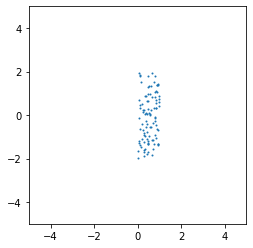

In [21]:
# Sampling from uniform 2D
N = 100
X = np.random.uniform(low=(0.0, -2.0), high=(1.0, 2.0), size=(N,2))
X = X.T
plt.scatter(X[0], X[1], s=1)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.gca().set_aspect('equal')

Text(0.5, 1.0, 'Histogram')

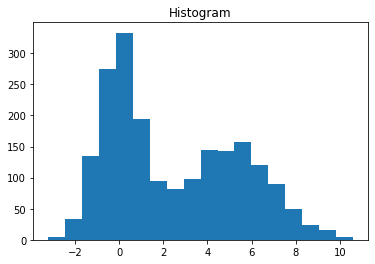

In [14]:
# Generate a histogram
rng = np.random.RandomState(10)
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins='auto')
plt.title("Histogram")

In [20]:
# does partitioning of the array so that the 1 to k-1-th smallest elements in the array are 
# moved to the left of the array, the k-th smallest element is moved to the k-th place in the array
# and the rest of the larger elements are move to the right of the array
a = np.array([5,3,10,7,0,6,2,1])
np.testing.assert_array_equal(np.partition(a, 2), a[np.argpartition(a, 2)])
np.partition(a, 2)

array([ 0,  1,  2,  7,  5,  6, 10,  3])

In [28]:
# Sorting an array in place
a = np.random.randint(10, size=10)
b = a.copy()
b.sort()
a, b

(array([5, 6, 9, 8, 6, 0, 0, 2, 1, 8]), array([0, 0, 1, 2, 5, 6, 6, 8, 8, 9]))

In [6]:
# np.in1d() tests whether each element of a 1-D array is also present in a second array.
a = np.arange(1, 20+1)
b = np.arange(5,15+1)
intersection_mask = np.in1d(a, b)
difference_mask = np.in1d(a, b, invert=True)

util.doc.results(
"a", a,
"b", b,
"intersection of a, b", a[intersection_mask],
"difference of a, b", a[difference_mask]
)

a
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

b
[ 5  6  7  8  9 10 11 12 13 14 15]

intersection of a, b
[ 5  6  7  8  9 10 11 12 13 14 15]

difference of a, b
[ 1  2  3  4 16 17 18 19 20]


In [150]:
def consecutive_points_distances(X):
    d = np.diff(X, axis=0)**2
    return np.sqrt(d.sum(axis=1) if d.ndim > 1 else d)

def cumulative_points_distances(X):
    return np.cumsum(consecutive_points_distances(X))

points1 = np.array([1,2,4,8,4,0,1])
points2 = np.array([
    [  1, 2],
    [ -1, 1],
    [  1, 0],
    [  2, 1],
    [  2, 4],
    [  0, 3],
    [ -1, 3]
])
points3 = np.array([
    [0, 0, 0],
    [0, 2, 1],
    [1, 2, 0],
    [1, -2, 0],
    [0, -1, 1]
])
points = [points1, points2, points3]
np.set_printoptions(precision=3)
util.doc.results(
    "1D points", points[0],
    "distances of consecutive 1D points", consecutive_points_distances(points[0]),
    "cumulative distances of consecutive 1D points", cumulative_points_distances(points[0]),
    "2D points", points[1].tolist(),
    "distances of consecutive 2D points", consecutive_points_distances(points[1]),
    "cumulative distances of consecutive 2D points", cumulative_points_distances(points[1]),
    "3D points", points[2].tolist(),
    "distances of consecutive 4D points", consecutive_points_distances(points[2]),
    "cumulative distances of consecutive 4D points", cumulative_points_distances(points[2]),
start="Cumulating distances between consecutive points.")

Cumulating distances between consecutive points.

1D points
[1 2 4 8 4 0 1]

distances of consecutive 1D points
[1. 2. 4. 4. 4. 1.]

cumulative distances of consecutive 1D points
[ 1.  3.  7. 11. 15. 16.]

2D points
[[1, 2], [-1, 1], [1, 0], [2, 1], [2, 4], [0, 3], [-1, 3]]

distances of consecutive 2D points
[2.236 2.236 1.414 3.    2.236 1.   ]

cumulative distances of consecutive 2D points
[ 2.236  4.472  5.886  8.886 11.122 12.122]

3D points
[[0, 0, 0], [0, 2, 1], [1, 2, 0], [1, -2, 0], [0, -1, 1]]

distances of consecutive 4D points
[2.236 1.414 4.    1.732]

cumulative distances of consecutive 4D points
[2.236 3.65  7.65  9.382]


In [151]:
a = np.array([1, 2, 2 + 1e-10, 3, 4, 4 + 1e-10, 5, 6, 6, 7])
mask = ~np.isclose(np.diff(a), 0.)
mask = np.insert(mask, -1, True)
util.doc.results(
    "1D array a", a,
    "a with duplicates removed", a[mask],
"Removing duplicates")

1D array a
[1. 2. 2. 3. 4. 4. 5. 6. 6. 7.]

a with duplicates removed
[1. 2. 3. 4. 5. 6. 7.]

Removing duplicates
None


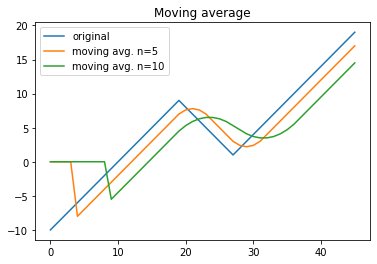

In [12]:
# Moving average
# Based on
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def f(a, n):
    """Zero out beginning of last axis"""
    pad_width = [(0, 0) for _ in range(a.ndim - 1)] + [(n, 0)]
    return np.pad(a, pad_width, mode='constant', constant_values=0)

a = np.concatenate((
    np.arange(-10, 10),
    np.flip(np.arange(1, 9)),
    np.arange(2, 20)
))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a, label="original")
ax.plot(f(moving_average(a, n=5), 4), label="moving avg. n=5")
ax.plot(f(moving_average(a, n=10), 9), label="moving avg. n=10")
ax.legend()
ax.set_title("Moving average"); None

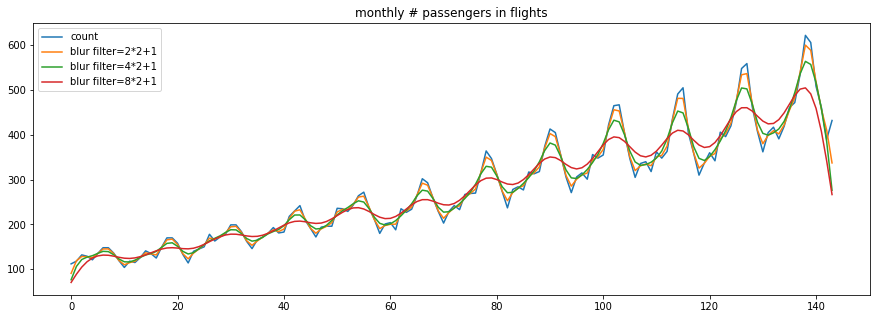

In [108]:
# Gaussian blur convolution on Seaborn flights dataset.

def kernel_gaussian(N, M, *params):
    x = np.linspace(-M, M, 2*N + 1)
    z = scipy.stats.norm.pdf(x, loc=0, scale=1)
    return z / np.sum(z)

def apply_kernel_1d(x, kernel, *params):
    z = kernel(*params)
    y = np.convolve(x, z, mode='full')
    l = len(z)
    N = (l - 1 if l % 2 == 1 else l) // 2
    return y[N:-N], z

flights = sns.load_dataset("flights")
passengers = flights["passengers"]
y1, z1 = apply_kernel_1d(passengers, kernel_gaussian, 2, 3)
y2, z2 = apply_kernel_1d(passengers, kernel_gaussian, 4, 3)
y3, z3 = apply_kernel_1d(passengers, kernel_gaussian, 8, 3)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ax.plot(passengers, label="count")
ax.plot(y1, label="blur filter=2*2+1")
ax.plot(y2, label="blur filter=4*2+1")
ax.plot(y3, label="blur filter=8*2+1")
ax.legend()
ax.set_title("monthly # passengers in flights"); None

In [83]:
# read CSV of weather history. See doc.kaggle.ipynb on how to download CSV
weather_csvfile = "../data/weatherHistory.csv"
weather_df = pd.read_csv(weather_csvfile)
weather_df["Formatted Date"] = pd.to_datetime(weather_df["Formatted Date"])
weather_df.sort_values(by=["Formatted Date"], inplace=True)

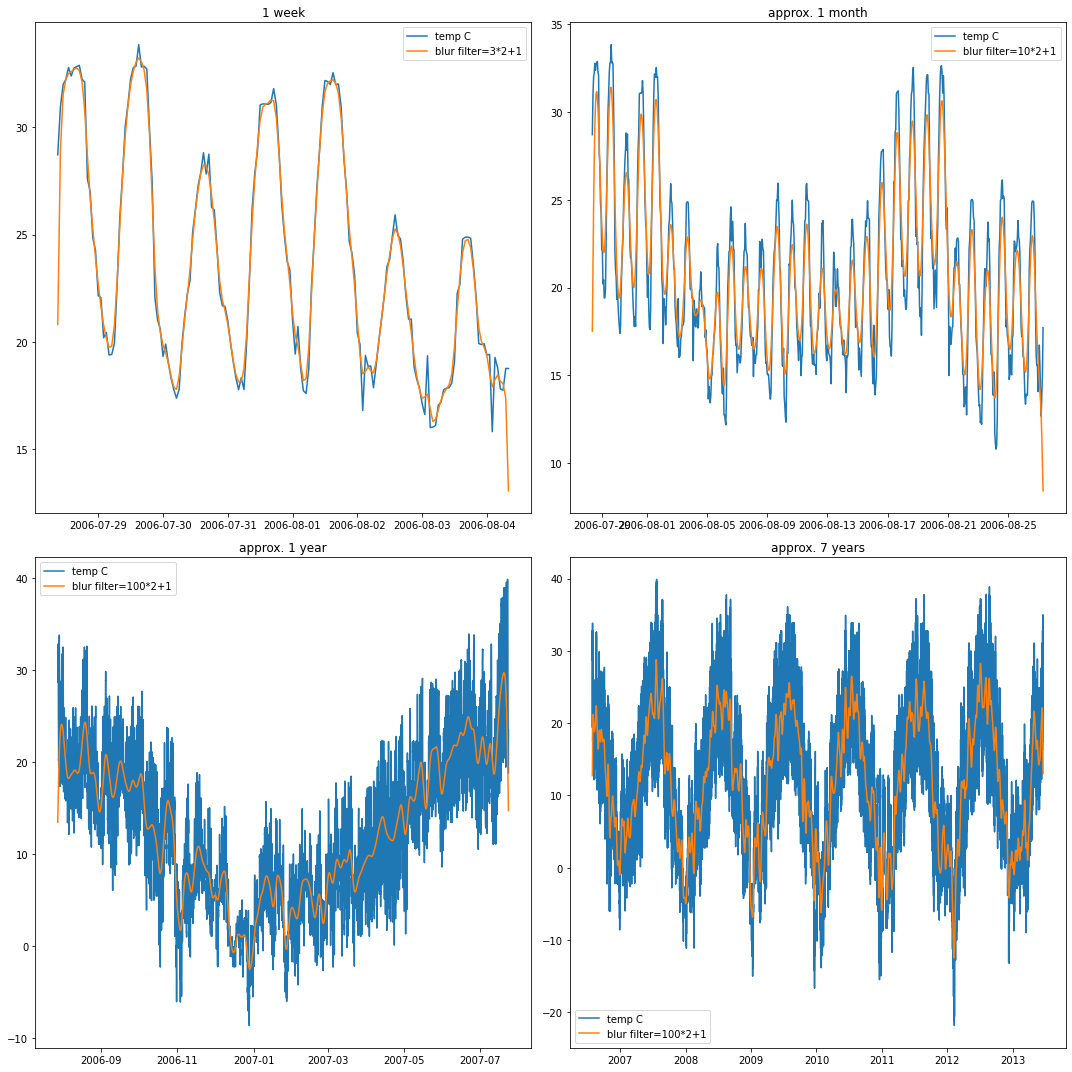

In [115]:
# Gaussian blur convolution on weather dataset under different filter parameters.

def kernel_gaussian(N, M, *params):
    x = np.linspace(-M, M, 2*N + 1)
    z = scipy.stats.norm.pdf(x, loc=0, scale=1)
    return z / np.sum(z)

def apply_kernel_1d(x, kernel, *params):
    z = kernel(*params)
    y = np.convolve(x, z, mode='full')
    l = len(z)
    N = (l - 1 if l % 2 == 1 else l) // 2
    return y[N:-N], z

flights = sns.load_dataset("flights")
passengers = flights["passengers"]
y1, z1 = apply_kernel_1d(passengers, kernel_gaussian, 2, 3)
y2, z2 = apply_kernel_1d(passengers, kernel_gaussian, 4, 3)
y3, z3 = apply_kernel_1d(passengers, kernel_gaussian, 8, 3)

N = 5000

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(221)

_slice = slice(N, N + 7*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
y1, _ = apply_kernel_1d(temperature, kernel_gaussian, 3, 3)
ax.plot(datetime, temperature, label="temp C")
ax.plot(datetime, y1, label="blur filter=3*2+1")
ax.legend()
ax.set_title("1 week")

ax = fig.add_subplot(222)
_slice = slice(N, N + 30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
y1, _ = apply_kernel_1d(temperature, kernel_gaussian, 10, 3)
ax.plot(datetime, temperature, label="temp C")
ax.plot(datetime, y1, label="blur filter=10*2+1")
ax.legend()
ax.set_title("approx. 1 month")

ax = fig.add_subplot(223)
_slice = slice(N, N + 12*30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
y1, _ = apply_kernel_1d(temperature, kernel_gaussian, 100, 3)
ax.plot(datetime, temperature, label="temp C")
ax.plot(datetime, y1, label="blur filter=100*2+1")
ax.legend()
ax.set_title("approx. 1 year")

ax = fig.add_subplot(224)
_slice = slice(N, N + 7*12*30*24)
datetime = weather_df["Formatted Date"][_slice]
temperature = weather_df["Temperature (C)"][_slice]
y1, _ = apply_kernel_1d(temperature, kernel_gaussian, 200, 3)
ax.plot(datetime, temperature, label="temp C")
ax.plot(datetime, y1, label="blur filter=200*2+1")
ax.legend()
ax.set_title("approx. 7 years")

fig.tight_layout()

## Matrix Math

In [9]:
# Don't use np.matrix, instead convert it to np.array before doing operations with it.
# See:
# https://stackoverflow.com/questions/53254738/deprecation-status-of-the-numpy-matrix-class
A = np.matrix([
        [-0.5, 0],
        [ 0,   2]])
b = np.array([1,-1])
A @ b, np.array(A) @ b

(matrix([[-0.5, -2. ]]), array([-0.5, -2. ]))

## Scratch work

In [ ]:
A = np.full((3,2,4), 1)
A, np.apply_over_axes(np.sum, A, (0,1))

In [ ]:
# Based on:
# https://stackoverflow.com/questions/3654289/scipy-create-2d-polygon-mask

width, height=2000, 2000

# can't draw line segments
polygon=[(0.1*width, 0.1*height), (0.15*width, 0.7*height), (0.8*width, 0.75*height), (0.72*width, 0.15*height)]
poly_path=Path(polygon)

x, y = np.mgrid[:height, :width]
coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) # coors.shape is (4000000,2)

mask = poly_path.contains_points(coors)
plt.imshow(mask.reshape(height, width))

In [ ]:
# Based on:
# https://stackoverflow.com/questions/18632276/how-to-draw-a-line-on-an-image-in-opencv
# API is:
# https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html

width, height = 150, 150
x1, y1 = 0, 0
x2, y2 = 100, 100
image = np.ones((height, width)) * 255
print(image.shape)

line_thickness = 1
img = cv.line(image, (x1, y1), (x2, y2), (0, 255, 0), thickness=line_thickness)

cv.fillPoly(imgage, pts, color[, lineType[, shift[, offset]]]	)

plt.imshow(image.T)

In [45]:
n = 4
A = np.arange(8*n).reshape((-1,8))
B = np.array([[2, 0],[0, 1], [0, 2]])
"""
array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])
"""
Ap = np.stack((A[:, 0:2].T, A[:, 2:4].T, A[:, 4:6].T, A[:, 6:8].T))
C = np.einsum("ij,...jk->...ik", B, Ap)
"""
array([[[ 0, 16, 32, 48],
        [ 1,  9, 17, 25],
        [ 2, 18, 34, 50]],

       [[ 4, 20, 36, 52],
        [ 3, 11, 19, 27],
        [ 6, 22, 38, 54]],

       [[ 8, 24, 40, 56],
        [ 5, 13, 21, 29],
        [10, 26, 42, 58]],

       [[12, 28, 44, 60],
        [ 7, 15, 23, 31],
        [14, 30, 46, 62]]])
"""
D = np.max(C, axis=(1,2))
# D, np.max(D, axis=1)
D

array([50, 54, 58, 62])

In [5]:
#
A = np.array([
    [1, 2],
    [3, 4]
])
A = np.expand_dims(A, axis=1)
A = np.tile(A, (2,1))

B = np.array([
    [2, 1],
    [-1, -2]
])
B = np.expand_dims(B, axis=1)
B = np.tile(B, (2,1))
B = np.swapaxes(B, 0, 1)
np.linalg.norm(A - B, axis=-1)

[[[ 2  1]
  [-1 -2]]

 [[ 2  1]
  [-1 -2]]]


array([[1.41421356, 4.47213595],
       [3.16227766, 7.21110255]])

In [35]:
# using argpartition along the last dimension to partition.
# by default np.partition and np.argpartition use axis -1.

A = np.array([
    [5,3,10,7,0,6,2,1],
    [8,5,10,4,0,6,2,11],
])

np.argpartition(A, 2)

# should give indices that make
# array([[ 0,  1,  2,  7,  5,  6, 10,  3],
#        [ 0,  2,  4, 10,  8,  6,  5, 11]])

array([[4, 7, 6, 3, 0, 5, 2, 1],
       [4, 6, 3, 2, 0, 5, 1, 7]])

In [34]:
# how to modify specific cells in a matrix using a matrix of indices.

A = np.array([
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
])
B = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
])
for idx in range(A.shape[0]):
    A[idx,B[idx]] = 1
A

array([[1, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 1]])

In [37]:
# for a homework
W = np.array([
    [-2, 2, -1],
    [1, -2, 0]
])
v = np.array([3, 1])
x = np.array([-3, -2, 2])
z = W @ x.T
z
# sigmoid(z)
np.dot(v, sigmoid(z))


2.231058578630005

In [38]:
X = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
    [2,0],
    [0,0]
])
s = slice(2,4)
X[s]

array([[1, 0],
       [3, 1]])

In [39]:
X = np.array([
    [0,1],
    [1,2],
    [1,0],
    [3,1],
    [2,0],
    [0,0]
])
ids = np.arange(X.shape[0])
np.random.shuffle(ids)
X = X[ids]
X, ids

(array([[2, 0],
        [3, 1],
        [1, 0],
        [0, 0],
        [0, 1],
        [1, 2]]),
 array([4, 3, 2, 5, 0, 1]))